<a href="https://colab.research.google.com/github/NilbertoFreitas/Dataviz/blob/main/Dataviz_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
#Importação da base de dados
df = pd.read_csv('https://raw.githubusercontent.com/NilbertoFreitas/Dataviz/main/netflix_titles.csv', sep=',', parse_dates=True)

In [ ]:
#Verificar Estrutura da base de dados
print(df.shape)
df.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Verificação de campos Nulos e tipo de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [ ]:
#Soma dos campos nulos por coluna
print(df.isna().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
#Apagar todas as linhas que contenham pelo menos um campo nulo e armazenar em um novo Dataframe
netflix = df.dropna()
print(netflix.shape)
netflix.head()

(5332, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [41]:
#Analisar nova estrutura após os ajustes
print(netflix.isna().sum())
print(netflix.info())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 670.6+ KB
None


Movie      5185
TV Show     147
Name: type, dtype: int64


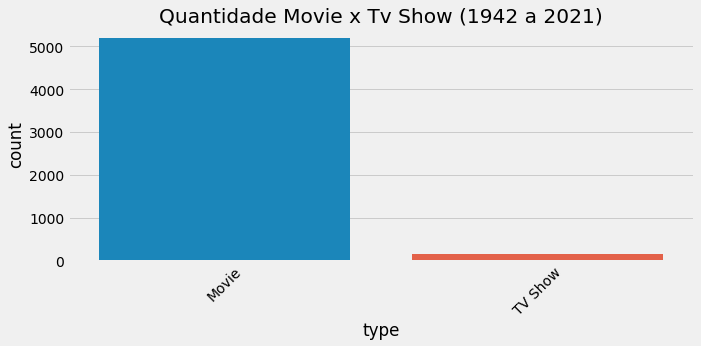

In [42]:
#Lançamento de filmes e séries por período
print(netflix.type.value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x=netflix.type)
plt.title('Quantidade Movie x Tv Show (1942 a 2021)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.rc('figure', figsize = (15, 8))
area = plt.figure()

g2 = plt.bar(df['release_year'], df[(df['type']=='Movie')], label = 'Receitas', color = 'blue')   #plotando receitas
#g3 = plt.bar(df['release_year'], df[(df['type']=='TV Show')], label = 'Gastos', color = 'red')     #plotando gastos
plt.title('Fluxo de caixa')
plt.legend()

plt.plot()

In [ ]:
tabela = pd.pivot_table(data=netflix, values='show_id', index='release_year', columns='type', aggfunc='count').reset_index()
tabela.fillna(0, inplace = True)
print(tabela.head())
print(tabela.tail())
fig, ax = plt.subplots(figsize=(20,6))
tabela.rename(columns={'TV Show': 'TV_Show'}, inplace = True)


ax.plot(tabela.release_year, tabela.Movie, label='Movies', alpha=1.0)
ax.plot(tabela.release_year, tabela.TV_Show, label='TV Shows', alpha=1.0)

ax.set_title('Lançamento de Filmes e Shows de TV', fontsize=14, weight='bold')
ax.set_xlabel("Ano de Lançamento")
ax.set_ylabel("Quantidade de Lançamentos")
ax.legend(fontsize=12)

ax.xaxis.set_major_locator(ticker.MaxNLocator(20))

plt.show()

In [49]:
tabela

type,release_year,Movie,TV_Show
0,1942,1.0,0.0
1,1944,1.0,0.0
2,1945,1.0,0.0
3,1946,1.0,0.0
4,1947,1.0,0.0
...,...,...,...
67,2017,640.0,17.0
68,2018,632.0,16.0
69,2019,495.0,24.0
70,2020,409.0,33.0


[]

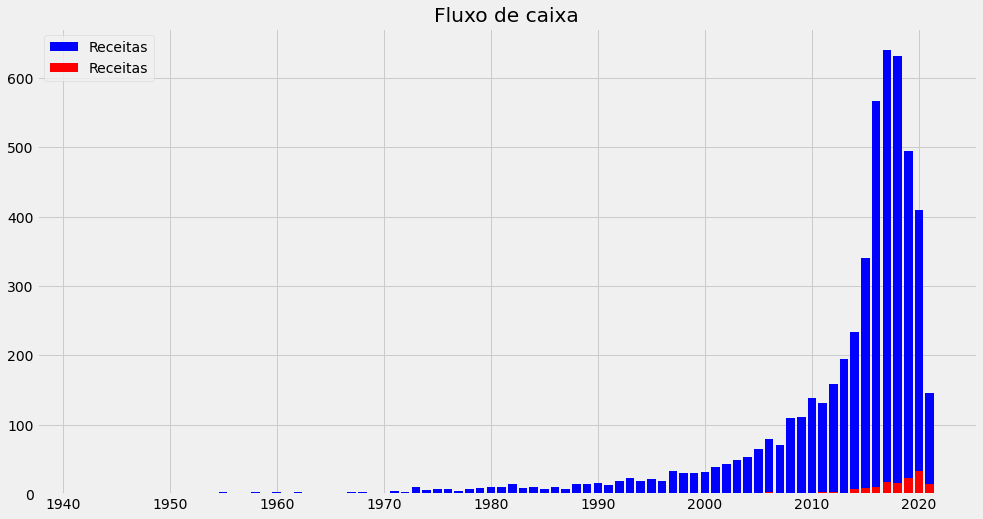

In [54]:
plt.rc('figure', figsize = (15, 8))
area = plt.figure()

g2 = plt.bar(tabela['release_year'], tabela['Movie'], label = 'Receitas', color = 'blue')   #plotando receitas
g3 = plt.bar(tabela['release_year'], tabela['TV_Show'], label = 'Receitas', color = 'red')   #plotando receitas
plt.title('Fluxo de caixa')
plt.legend()

plt.plot()